      Iter       Train Loss   Remaining Time 
         1           1.0190            5.20s
         2           0.9192            5.20s
         3           0.8272            5.06s
         4           0.7834            5.01s
         5           0.7109            4.97s
         6           0.6368            4.92s
         7           0.5797            4.89s
         8           0.5610            4.83s
         9           0.5185            4.78s
        10           0.4984            4.74s
        20           0.1999            4.54s
        30           0.1313            4.34s
        40           0.0790            4.37s
        50           0.0511            4.21s
        60           0.0352            4.04s
        70           0.0245            3.86s
        80           0.0162            3.67s
        90           0.0114            3.46s
       100           0.0077            3.25s
       200           0.0002            1.08s
      Iter       Train Loss   Remaining Time 
        

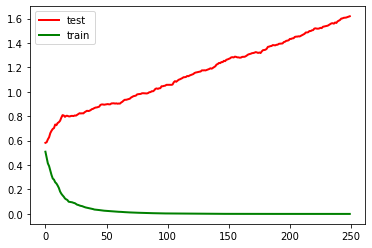

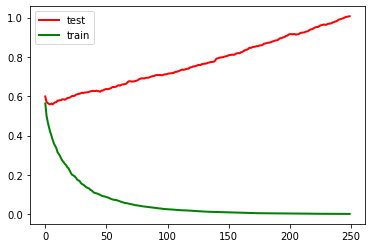

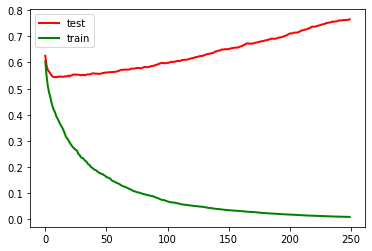

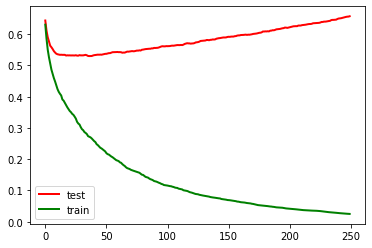

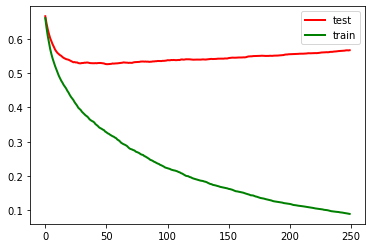

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier 

%matplotlib inline


def sigmoid(x): return 1/(1+np.exp(-x))

def create_file(filename, *content):
    file = open(filename, 'w')
    file.write(' '.join(map(str, content)))
    file.close()

# Загрузите выборку из файла gbm-data.csv с помощью pandas
# и преобразуйте ее в массив numpy (параметр values у датафрейма).
# В первой колонке файла с данными записано, была или нет реакция.
# Все остальные колонки (d1 - d1776) содержат различные характеристики молекулы,
# такие как размер, форма и т.д.
# Разбейте выборку на обучающую и тестовую, используя функцию train_test_split с параметрами test_size = 0.8 и random_state = 241.

data = pd.read_csv('gbm-data.csv', delimiter=',')
X = data[data.columns[1:]]
y = data[data.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.8,
                                                    random_state=241)

# Обучите GradientBoostingClassifier с параметрами n_estimators=250, verbose=True, random_state=241
# и для каждого значения learning_rate из списка [1, 0.5, 0.3, 0.2, 0.1] проделайте следующее:
for k in [1, 0.5, 0.3, 0.2, 0.1]:
    model = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=k)
    model.fit(X_train, y_train)
    
    # Используйте метод staged_decision_function для предсказания качества на обучающей и тестовой выборке на каждой итерации.
    # Преобразуйте полученное предсказание с помощью сигмоидной функции по формуле 1 / (1 + e^{−y_pred}), 
    # где y_pred — предсказанное значение.
    y_train_pred = [sigmoid(step) for step in model.staged_decision_function(X_train)]
    y_test_pred = [sigmoid(step) for step in model.staged_decision_function(X_test)]

    train_loss = [log_loss(y_train, y_pred) for y_pred in y_train_pred]
    test_loss = [log_loss(y_test, y_pred) for y_pred in y_test_pred]
    
    plt.figure()
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    
    # Приведите минимальное значение log-loss на тестовой выборке и номер итерации, на котором оно достигается, 
    # при learning_rate = 0.2.
    if k == 0.2:
        min_loss_index, min_loss = min(enumerate(test_loss), key=operator.itemgetter(1))
        create_file('5-2-2.txt', min_loss, min_loss_index)
    
# На этих же данных обучите RandomForestClassifier с количеством деревьев, 
# равным количеству итераций, на котором достигается наилучшее качество у градиентного бустинга 
# из предыдущего пункта, c random_state=241 и остальными параметрами по умолчанию.
# Какое значение log-loss на тесте получается у этого случайного леса? 
# (Не забывайте, что предсказания нужно получать с помощью функции predict_proba. 
# В данном случае брать сигмоиду от оценки вероятности класса не нужно)
model_forest = RandomForestClassifier(n_estimators=min_loss_index,random_state=241)
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict_proba(X_test)
loss = log_loss(y_test, y_pred)
create_file('5-2-3.txt', loss)